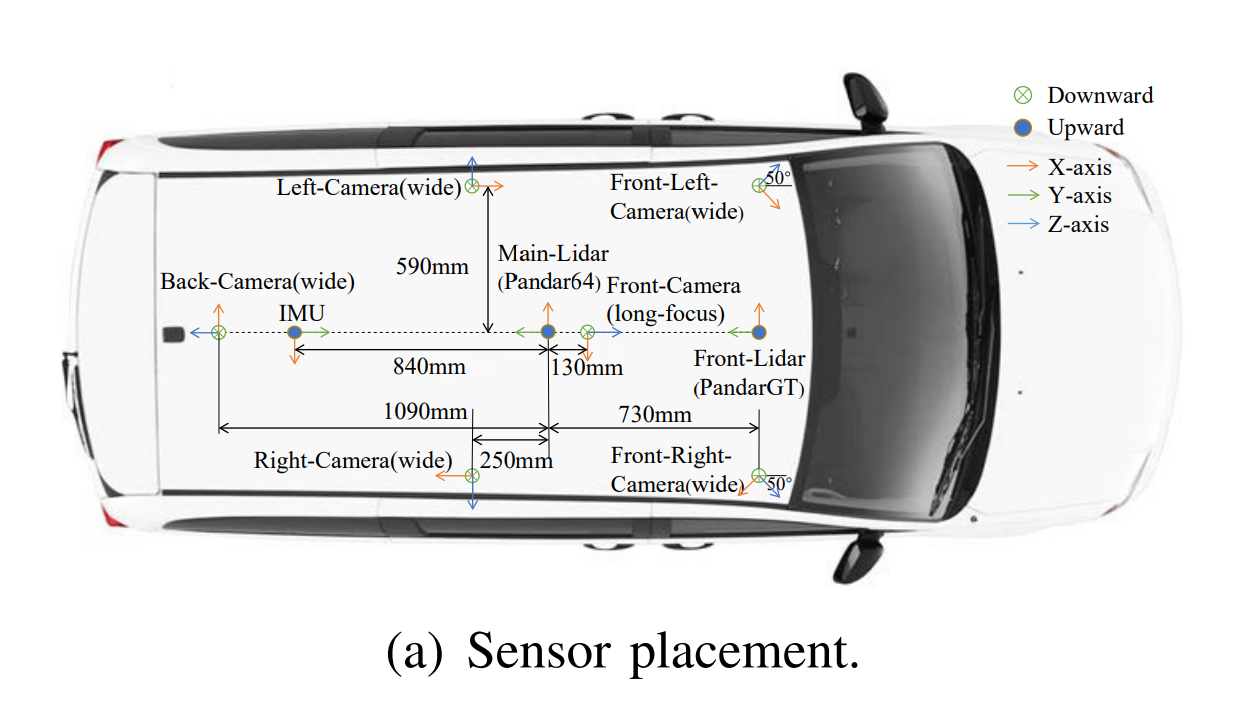

In [1]:
from IPython.display import Image

# Specify the path to your image file
image_path = 'sensor-placement-pandaset.png'

# Display the image
Image(filename=image_path, width=700, height=500)


### Convert from lidar to camera frame

Consider two cases:

1. The camera and lidar frame have the same orientation (x right, y down, z front) but they are shifted by 1 m in z axis
2. The camera and lidar frames have different different orientation. Camera (x right, y down, z front) and Lidar (x right, y front, z up)

In [2]:
import numpy as np
# for Case 1

camera_in_lidar = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 1],
                           [0, 0, 0, 1]])

### Understanding the 4x4 Pose Matrix

In [3]:
# The first 3x3 part corresponds to the rotation matrix

rotation_camera_in_lidar = camera_in_lidar[:3,:3]
print(rotation_camera_in_lidar)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
# The rightmost column first 3 elements correspond to translation

translatoin_camera_in_lidar = camera_in_lidar[:3,-1]
print(translatoin_camera_in_lidar)

[0 0 1]


In [5]:
lidar_pose_in_world = np.array([[1, 0, 0, 5],
                                [0, 1, 0, 4],
                                [0, 0, 1, 2],
                                [0, 0, 0, 1]])

In [6]:
lidar_pose_in_world

array([[1, 0, 0, 5],
       [0, 1, 0, 4],
       [0, 0, 1, 2],
       [0, 0, 0, 1]])

In [7]:
camera_in_lidar

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 1]])

In [8]:
lidar_pose_in_world @ camera_in_lidar

array([[1, 0, 0, 5],
       [0, 1, 0, 4],
       [0, 0, 1, 3],
       [0, 0, 0, 1]])

In [9]:
# for case 2

camera_in_lidar = np.array([[1, 0, 0, 0],
                            [0, 0, 1, 0],
                            [0, -1, 0, 1],
                            [0, 0, 0, 1]
                           ])

In [10]:
camera_in_world = lidar_pose_in_world @ camera_in_lidar
print(camera_in_world)

[[ 1  0  0  5]
 [ 0  0  1  4]
 [ 0 -1  0  3]
 [ 0  0  0  1]]


## Transform lidar point to camera frame


In [11]:
point_in_lidar_frame = np.array([1,2,3])

# convert to homogeneous coordinates
point_in_lidar_frame = np.append(point_in_lidar_frame, 1)

In [12]:
# for Case 1

camera_in_lidar = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 1],
                           [0, 0, 0, 1]])

In [13]:
lidar_in_camera = np.linalg.inv(camera_in_lidar)

In [14]:
print(lidar_in_camera)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]


In [15]:
point_in_camera_frame = lidar_in_camera @ point_in_lidar_frame.T

In [16]:
print("point in camera frame: ", point_in_camera_frame[:3])

point in camera frame:  [1. 2. 2.]


In [17]:
# for case 2

camera_in_lidar = np.array([[1, 0, 0, 0],
                            [0, 0, 1, 0],
                            [0, -1, 0, 1],
                            [0, 0, 0, 1]
                           ])

In [18]:
lidar_in_camera = np.linalg.inv(camera_in_lidar)

In [19]:
point_in_camera_frame = lidar_in_camera @ point_in_lidar_frame.T

In [20]:
print("point in camera frame: ", point_in_camera_frame[:3])

point in camera frame:  [ 1. -2.  2.]
